<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

На данный момент я вижу следующий план действий:

1) Определить, какие из столбцов нам необходимы для исследования а от каких нам не будет толка чтобы не тратить на них время.

2) Привести в порядок типы данных (last price, first_day_exposition)

3) Разобраться с пропусками.

4) Избавиться от дубликатов если такие будут

## Предобработка данных

1) Определить, какие из столбцов нам необходимы для исследования а от каких нам не будет толка чтобы не тратить на них время.

После анализа поставленных целей в проекте, я сделал вывод что в данном исследовании нам не нужны столбцы 'airoport_nearest', 'balcony', 'is_appartment', 'open_plan' 'park_around3000', 'park_nearest', 'pounds_around3000', 'pounds_nearest', 'studio', 'total_images'. В теории можно было бы сделать какие то выводы и из этих столбцов, но это не входит в цели нашего исследования.

In [5]:
dframe = df.drop(['total_images', 'balcony', 'is_apartment', 'airports_nearest', 'open_plan', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'studio'], axis = 1)

2) Привести в порядок типы данных (last price, first_day_exposition)

Поскольку цены квартир измеряются в миллионах и сотнях тысяч, мы можем превратить тип данных у этого столбца в целочисленный,  копейки никак не повлияют на анализ данных таких больших цифр.

Столбец с датой выставления объявления необходимо привести к формату даты, чтобы в дальнейшем мы могли вытащить из него информацию которую по проекту необходимо добавить в таблицу.

In [6]:
dframe['last_price'] = dframe['last_price'].astype('int')

In [7]:
dframe['first_day_exposition'] = pd.to_datetime(dframe['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  int64         
 1   total_area            23699 non-null  float64       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        14504 non-null  float64       
 5   floors_total          23613 non-null  float64       
 6   living_area           21796 non-null  float64       
 7   floor                 23699 non-null  int64         
 8   kitchen_area          21421 non-null  float64       
 9   locality_name         23650 non-null  object        
 10  cityCenters_nearest   18180 non-null  float64       
 11  days_exposition       20518 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 2.2+ M

3) Разобраться с пропусками.

Пропуски по высоте потолка можно было бы заменить на 2,7 что соответствует рекомендациям СНиП 31-01-2003 с СП 54.13330.2011, но с учетом что у нас пропущенные значения составляют порядка 40%, это даст нам аномальный рост такой высоты при анализе, что будет не объективно. (к этому я пришел после вывода гистограммы)

Пропуски по этажам заменить не на что, дома могут иметь любую этажность. Оставим как есть и при анализе этого столбца будем исключать строки без данных.

Пропуски по жилой площади и площади кухни можно заменить на общую площадь квартиры умноженную на средний коэффицент какой % от площади квартиры занимают кухня и жилая площадь.

Пропуски по названию города и расстоянием до центра мы вынуждены пропустить.

И пропуски по столбцу с кол-вом дней сколько висит объявление мы также трогать не будем, полагаю пропуски показывают что объявление все еще висит.

In [8]:
k_living_area = dframe['living_area'].mean() / dframe['total_area'].mean()
k_kitchen_area = dframe['kitchen_area'].mean() / dframe['total_area'].mean()

In [9]:
dframe['living_area'] = dframe['living_area'].fillna(dframe['total_area'] * k_living_area)

In [10]:
dframe['kitchen_area'] = dframe['kitchen_area'].fillna(dframe['total_area'] * k_kitchen_area)

4) Избавиться от дубликатов если такие будут

In [11]:
dframe.duplicated().sum()

0

## Расчёты и добавление результатов в таблицу

In [12]:
#Добавляем столбец с ценой квадратного метра
dframe['price_sqrt'] = dframe['last_price'] / dframe['total_area']
dframe['price_sqrt'] = dframe['price_sqrt'].astype('int')

In [13]:
#Добавляем столбцы с днем недели, месяцем и годом.
dframe['weekday_exposition'] = dframe['first_day_exposition'].dt.weekday
dframe['month_exposition'] = dframe['first_day_exposition'].dt.month
dframe['year_exposition'] = dframe['first_day_exposition'].dt.year

In [14]:
#Добавляем классификацию квартир по этажам
def class_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return('первый')
    if floor == floors_total:
        return('последний')
    return('другой')

In [15]:
dframe['class_floor'] = dframe.apply(class_floor, axis = 1)
dframe['class_floor'].value_counts()

другой       17446
последний     3336
первый        2917
Name: class_floor, dtype: int64

In [16]:
#Добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей
dframe['k_living_area'] = dframe['living_area'] / dframe['total_area']
dframe['k_kitchen_area'] = dframe['kitchen_area'] / dframe['total_area']

Мы рассчитали и добавили все необходимые столбцы в нашу таблицу, пора переходить к анализу данных.

## Исследовательский анализ данных

<AxesSubplot:>

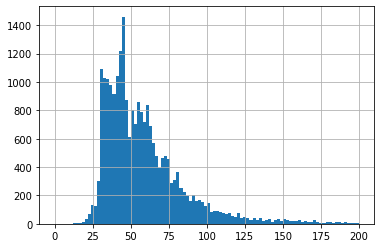

In [17]:
#При построении графика мы видим что большая часть значений находится в пределах 200 м2, поэтому ограничим гистограмму соответственно.
dframe['total_area'].hist(bins = 100, range = (0, 200))

<AxesSubplot:>

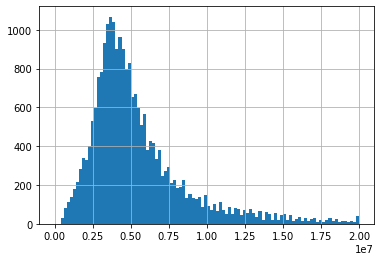

In [18]:
#Цены на квартиры могут варироваться очень сильно, самое большое значение 763кк, но основной диапазон попадает в пределы 200кк.
#dframe['last_price'].max()
dframe['last_price'].hist(bins = 100, range = (0, 20000000))

<AxesSubplot:>

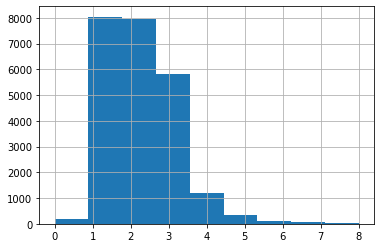

In [19]:
dframe['rooms'].hist(bins = 9, range = (0, 8))
#dframe.query('rooms < 1').sort_values(by = 'total_area', ascending = True)
#У нас в таблице есть 197 квартир у которых указано 0 комнат. 
#можно предположить что это студии или комнаты в общежитиях, однако в выборке также есть значения с площадью явно выше чем может быть у студии.

<AxesSubplot:>

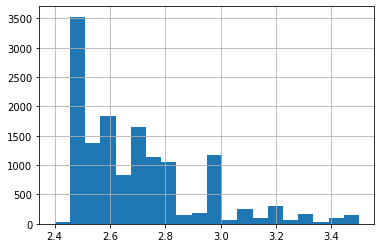

In [20]:
dframe['ceiling_height'].hist(bins = 20, range = (2.4, 3.5))
# Тут мы видим что высота потолков в большинстве квартир варируется в диапазоне от 2,5 до 3 метров

Исходя из полученных данных можно сделать промежуточные выводы о продаже квартир:

1) Большая часть продаваемых квартир находятся в диапазоне от 2,5 до 6 млн рублей

2) Большая часть квартир имеют площадь от 25 до 70 м2 и от 1 до 3 комнат (что логично, и дает нам понимание что данные похожи на правду)

3) У нас есть 197 квартир где не указано кол-во комнат и это нужно учитывать при дальнейшем анализе

4) Исходя из данных о высоте потолков, а конкретно из того что самая частая высота составляет 2,5 метра, можно сделать вывод что люди в данной выборке чаще продают старые квартиры (панельные хрущевки имели высоту 2,5м и 3м - сталинки). Новые квартиры строятся чаще всего с высотой потолков около 2,7 м.

<AxesSubplot:>

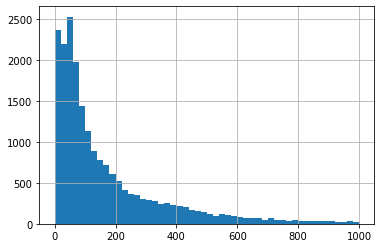

In [21]:
dframe['days_exposition'].hist(bins = 50, range = (0, 1000))

Большая часть квартир уходит в промежуток от 0 до 200 дней, далее кол-во квартир уходящих за большее время идет на спад. Чтобы понять какие значения у нас являются аномальными нужно посмотреть как происходит распределение на квартили.

In [22]:
dframe['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Поскольку квартили попадают в диапазон когда уходит большая часть квартир, я предлагаю считать 10% самых быстро проданных квартир как аномально быстрые, а 10% самых долгих, аномально долгими соответственно. Это у нас диапазоны до 20 дней и от 426 дней соответственно. Также мы видим что квартиры которые продаются очень долго увеличивают среднее кол-во дней на продажу квартир почти в два раза. Давайте сравним что произойдет если мы уберем слишком быстрые и слишком медленные продажи.

In [23]:
dframe['days_exposition'].value_counts().head(8)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
Name: days_exposition, dtype: int64

При исчезновении выбивающихся значений по дням выставления объявления, когда я взял отсев по 10% быстрых и медленных ничего существенно не изменилось ни в одном из графиков. Поэтому я попробовал сделать отсев по квартилям (и позже увеличил диапазон чтобы проверить 30), и в этом случае я увидел что у нас есть аномальные возрастания. При проверке оказалось что возрастания происходят на отсечках 30, 45, 60, и 90 дней, из чего можно сделать предположение что не все люди снимают объявления о продаже, т.к. такие отсечки характерны выбору на сколько дней выставлять объявление. Таких значений у нас около 7%, так что можно предположить что реальное среднее (и медианное) время продажи квартиры будет еще немного меньше чем мы видим.

При исчезновении выбивающихся значений по цене, никаких аномалий выявлено не было. Разве что подтверждаются очевидные закономерности что со срезом по цене уменьшается кол-во квартир где комнат больше 3 и происходит уменьшение площадей.
Исследовать остальные столбцы таким же образом не вижу смысла, так как мы придем к таким же выводам.

Переходим к заданию определения факторов больше всего влияющих на стоимость квартиры.

In [24]:
df_correlation = dframe[['last_price', 'total_area', 'cityCenters_nearest']]
df_correlation.head()

,last_price,total_area,cityCenters_nearest
0,13000000,108.0,16028.0
1,3350000,40.4,18603.0
2,5196000,56.0,13933.0
3,64900000,159.0,6800.0
4,10000000,100.0,8098.0


In [25]:
df_correlation.corr()

,last_price,total_area,cityCenters_nearest
last_price,1.000000,0.653675,-0.206747
total_area,0.653675,1.000000,-0.231446
cityCenters_nearest,-0.206747,-0.231446,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>]],
      dtype=object)

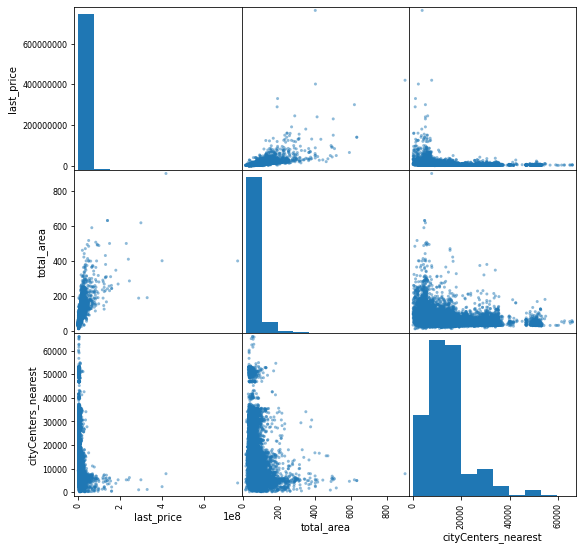

In [26]:
pd.plotting.scatter_matrix(df_correlation, figsize=(9, 9))

Мы видим что корреляция между ценой и площадью, имеет высокую положительную зависимость, также положительная корреляция характерна соотношению цены и кол-ва комнат. А вот удаленность от центра снижает цену на недвижимость. Давайте уберем выбросы и посмотрим что получится.

In [27]:
df_correlation_middle = df_correlation.query('last_price < 60000000 and total_area < 250')
df_correlation_middle.corr()

,last_price,total_area,cityCenters_nearest
last_price,1.000000,0.768311,-0.32996
total_area,0.768311,1.000000,-0.23865
cityCenters_nearest,-0.329960,-0.238650,1.00000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>]],
      dtype=object)

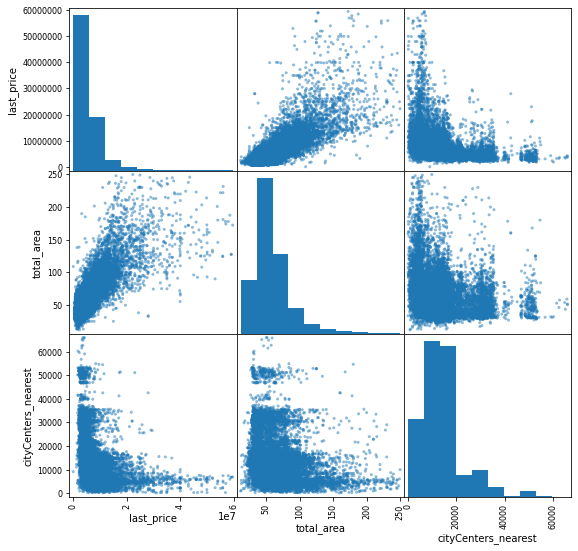

In [28]:
pd.plotting.scatter_matrix(df_correlation_middle, figsize=(9, 9))

После того как мы убрали выбросы, корреляция стала более линейной как в большую так и в меньшую сторону, что подтверждает следующие выводы:

1) Чем больше площадь тем больше цена.

2) Чем квартира более удалена от центра тем она дешевле.

3) Квартиры с большими площадями чаще встречаются не в самом центре, но вблизи от него. Что дает нам информацию о том что люди у которых много денег предпочитают иметь большие квартиры не далеко от центра. Люди не столь обеспеченные вынуждены жить далеко от центра, и при наличии возможности скорее переедут к центру чем захотят иметь большую квартиру вдали от инфраструктуры города.

4) Выброс более 40 км я не убрал умышленно, так как это скорее не выброс, а один из пригородов находящийся в 20 км от города.

<AxesSubplot:xlabel='class_floor'>

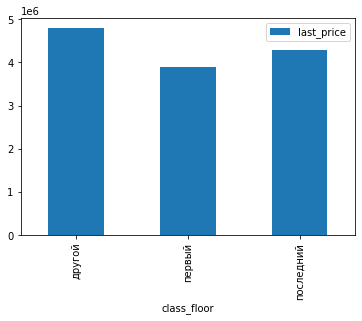

In [29]:
#поскольку у нас в данную выборку не попала зависимость по этажам - выведем ее отдельно.
df_correlation_discret = dframe[['last_price', 'total_area', 'cityCenters_nearest', 'rooms', 'class_floor']]
df_correlation_discret = df_correlation_discret.query('last_price < 60000000 and total_area < 250 and rooms < 10')
df_correlation_discret.pivot_table(index = 'class_floor', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')


Мы видим что люди предпочитают не покупать квартиры на первом и последнем этажах, настолько, что квартиры на первом этаже стоят почти на 20% дешевле чем на других этажах. Это может объясняться тем что первый и последний этажи более холодные, а другие получает тепло от соседей сверху и снизу. Последние этажи не имеют такого падения, поскольку не смотря на то что нет соседей сверху, тепло имеет свойство подниматься вверх. Также это может быть связано с тем что первые этажи более чувствительны к проблемам дома с канализацией, а последние может заливать дождем и таянием снега при износе крыши. 

<AxesSubplot:xlabel='rooms'>

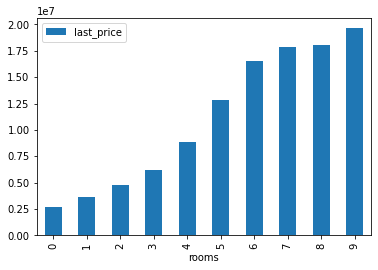

In [30]:
df_correlation_discret.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')

А по медианным ценам на квартиры в зависимости от кол-ва комнат все проще, больше комнат - больше цена. Это является логическим продолжением вывода о зависмости площади и цены. Мы видим что после 6 комнат цена на квартиры меняется не так сильно, вполне вероятно что площади квартир отличаются не сильно, но значительно отличается планировка. Также мы видим что значение "0" комнат которое мы уже выделяли ранее, по цене стоит ниже чем однокомнатные квартиры. Могу сделать предположение что как 0 комнат обозначают студии.

<AxesSubplot:xlabel='year_exposition,month_exposition'>

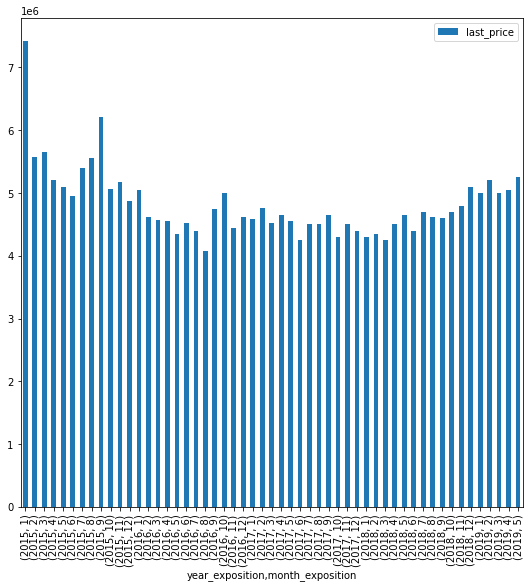

In [31]:
df_datetime = dframe[['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition', 'total_area']]
df_datetime = df_datetime.query('year_exposition > 2014')
df_datetime.pivot_table(index = ('year_exposition', 'month_exposition'), values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize = (9, 9))

<AxesSubplot:xlabel='year_exposition'>

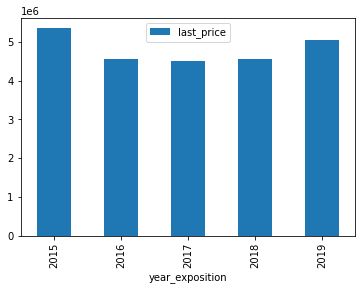

In [32]:
df_datetime.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')

При рассмотрении соотношения цены и дня, месяца, года, я не увидел никаких аномальных отклонений. C учетом что за 2014 год маленькая выборка (всего 137 квартир), и при рассмотрении медионных значений она дает выбросы, срежем ее.

При рассмотрении графика медианных цен по месяцам с начала 2015 года мы видим определенные колебания цен, но стабильной периодичности каждый год нет, возможно это просто случайные колебания, а возможно связано с событиями на рынке недвижимости.

По годам мы видим что после 2015 годы цены немного упали, 2016 - 2018 годы, держались стабильно, а в 2019 снова выросли. Никаких закономерностей и это странно. Поскольку мы уже выяснили что цена сильно зависит от площади, давайте выделим квартиры с диапазоном в котором продается больше всего квартир, и посмотрим что получится.

Из интересных моментов которые мы видим до среза, квартиры чаще продают весной и осенью, а летом и зимой квартир выставляется в полтора - два раза меньше. Также в будние дни квартир на продажу поступает в два раза больше чем в выходные. Также при просмотре кол-ва квартир по годам можно сказать что наша организация за два года увеличила количество клиентов почти в 4 раза.

<AxesSubplot:xlabel='year_exposition'>

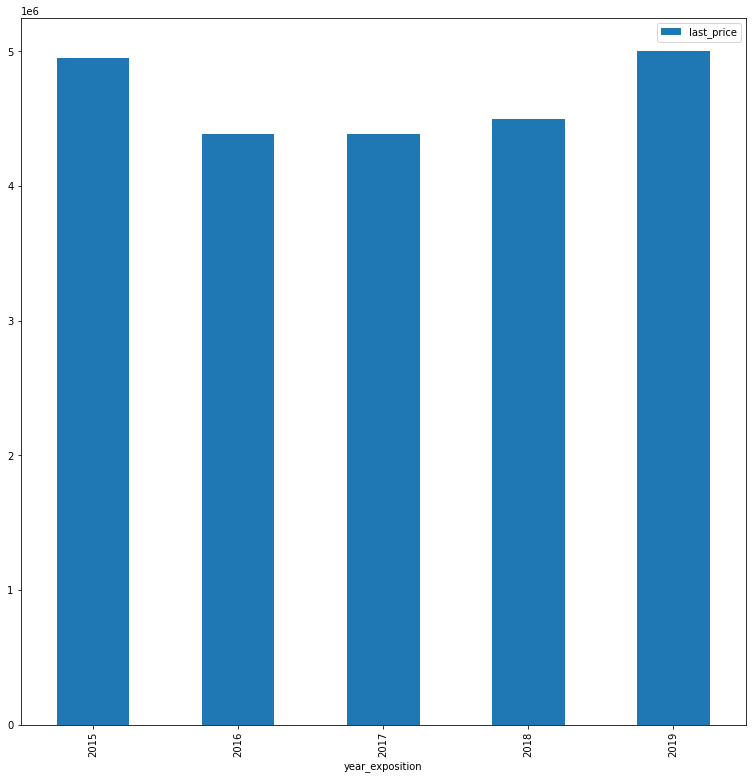

In [33]:
df_datetime_for_area = df_datetime.query('total_area > 30 and total_area < 100')
df_datetime_for_area.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize = (13, 13))

Если мы спишем завышение цены квартир в 2015 году за счет малого количества выставленных на продажу квартир в том году, то мы можем сделать предположение что с годами цены на квартиры растут, что логично объясняется ежегодной инфляцией. 

In [34]:
dframe['locality_name'].value_counts().head(30)



Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
посёлок Металлострой          66
Name: loca

In [35]:
def city_converse(row):
    last_word = []
    try:
        if len(row.split()) == 1:
            return(row)
        if len(row.split()) > 1:
            last_word = row.split()
            return(last_word[len(row.split()) - 1])
    except:
        return('error')
    

In [36]:
dframe['locality_name'] = dframe['locality_name'].apply(city_converse)

In [37]:
dframe['locality_name'].value_counts().head(10)

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [38]:
df_top10_city = dframe.query('locality_name == ("Санкт-Петербург", "Мурино", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Кудрово", "Выборг") ')

In [39]:
df_top10_city.pivot_table(index = 'locality_name', values = 'price_sqrt').sort_values(by = 'price_sqrt', ascending = False)

,price_sqrt
locality_name,
Санкт-Петербург,114848.565231
Пушкин,103125.373984
Кудрово,95324.476695
Парголово,90175.489297
Мурино,86087.055932
Шушары,78676.904545
Колпино,75424.150888
Гатчина,68745.693811
Всеволожск,68654.007538


При рассмотрении 10 городов у которых больше всего квартир в нашей таблице, мы выяснили что самая высокая цена за квадратный метр в Санкт Петербурге, а самая низкая в Выборге. Приступим к изучению квартир по Санкт Петербургу.

In [40]:
df_spb = dframe.query('locality_name == "Санкт-Петербург" and cityCenters_nearest >= 0').reset_index(drop = True)
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            15660 non-null  int64         
 1   total_area            15660 non-null  float64       
 2   first_day_exposition  15660 non-null  datetime64[ns]
 3   rooms                 15660 non-null  int64         
 4   ceiling_height        10073 non-null  float64       
 5   floors_total          15591 non-null  float64       
 6   living_area           15660 non-null  float64       
 7   floor                 15660 non-null  int64         
 8   kitchen_area          15660 non-null  float64       
 9   locality_name         15660 non-null  object        
 10  cityCenters_nearest   15660 non-null  float64       
 11  days_exposition       13613 non-null  float64       
 12  price_sqrt            15660 non-null  int64         
 13  weekday_expositi

In [41]:
df_spb['km_for_center'] = df_spb['cityCenters_nearest'] / 1000
df_spb['km_for_center'] = df_spb['km_for_center'].astype('int')
#df_spb.head(3)

<AxesSubplot:xlabel='km_for_center'>

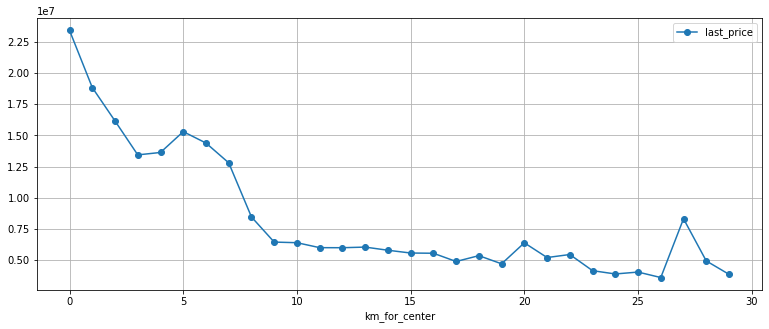

In [42]:
df_spb.pivot_table(index = 'km_for_center', values = 'last_price').plot(grid = True, style = 'o-', figsize = (13, 5))

Исходя из графика мы видим что резкое снижение цены прекращается после 3 км, соответственно можно сделать вывод что центральный район Санкт Петербурга имеет радиус 3км. Также далее происходит еще одно изменение на 8 км от центра, могу предположить что это расстояние до которого ходит метро, и как следствие квартиры находящиеся более 8 км от центра значительно падают в цене относительно расположеных близко к метро.

In [43]:
df_spb_center = df_spb.query('km_for_center <= 3').reset_index(drop = True)
#df_spb_center.describe()

<AxesSubplot:>

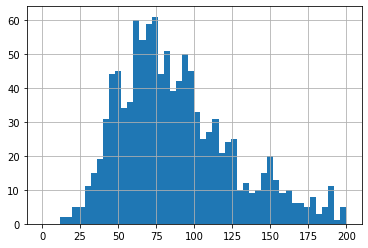

In [44]:
df_spb_center['total_area'].hist(bins = 50, range = (0, 200))

<AxesSubplot:>

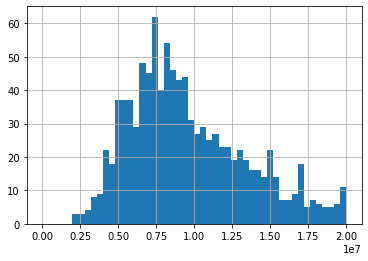

In [45]:
df_spb_center['last_price'].hist(bins = 50, range = (0, 20000000))

<AxesSubplot:>

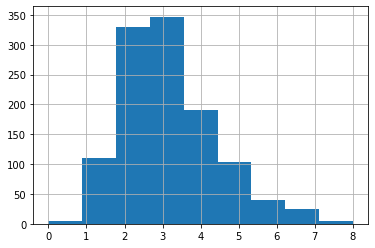

In [46]:
df_spb_center['rooms'].hist(bins = 9, range = (0, 8))

<AxesSubplot:>

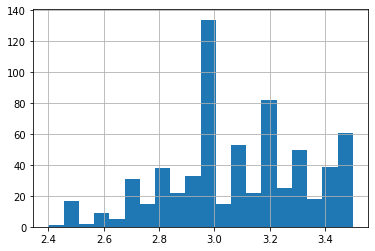

In [47]:
df_spb_center['ceiling_height'].hist(bins = 20, range = (2.4, 3.5))

При анализе параметров квартир в центральной части Санкт Петербурга мы видим что квартиры по площади больше чем при выборке всего СПБ с пригородами, также в центре сильно меньше кол-во однокомнатных квартир, зато больше квартир с 4 и более комнатами. Это может быть связано с тем что квартиры в центре строились в большинстве своем давно и раньше не было такого спроса на однушки. Цены в центре города в среднем в 2 раза выше чем в полной таблице по городу. А по высоте потолков большую часть составляют потолки высотой 3 метра и выше, возможно это один из факторов почему в центральном районе квертиры дороже аж в два раза. 

In [48]:
df_spb_center[['last_price', 'rooms', 'cityCenters_nearest']].corr()

,last_price,rooms,cityCenters_nearest
last_price,1.000000,0.244498,-0.093782
rooms,0.244498,1.000000,-0.050776
cityCenters_nearest,-0.093782,-0.050776,1.000000


In [49]:
df_spb_center.pivot_table(index = 'class_floor', values = 'last_price')

,last_price
class_floor,
другой,1.633633e+07
первый,9.586390e+06
последний,1.910997e+07


В отличии от всего города в центральном районе Санкт Петербурга, цены на недвижимость не сильно зависят от года, или кол-ва комнат, вероятно это связано с тем что в центре в основном большие квартиры с различными нестандартными планировками, это все таки исторический центр города и здания здесь в основном старые. Также историческая часть города объясняет низкую корреляцию цены от расстояния до центра, каждая квартира в центре имеет какие то свои плюсы по близости к достопримечательностям. Из нестандартного, в центральном районе последние этажи стоят дороже других, могу предположить что решающий фактор в этом случае вид из окна на достопримечательности.

В части дней и месяцов продаж, ситуация не отличается от основной таблицы, квартиры чаще всего продаются в конце зимы - начале весны и осенью, как в периоды когда меньше всего туристов. Квартиры в основном выставляются на продажу в будние дни. А в соотношении по годам мы можем все также увидеть что к 2017 и 2018 году у нашего сервиса увеличилось кол-во пользователей.

## Общий вывод

Как итог мы можем сделать следующие выводы:

1) Чем больше площадь квартиры и кол-во комнат в ней - тем она дороже.

2) Одним из самых важных факторов стоимости недвижимости является расстояние до центра.

3) В центральном районе стоимость недвижимости стабильно держится на одном и том же уровне, и тут основным фактором стоимости является площадь.

4) Квартиры на первых этажах как правило дешевле.

5) Важным фактором формирования цены является наличие рядом метро.